# *Ядерный метод опорных векторов*

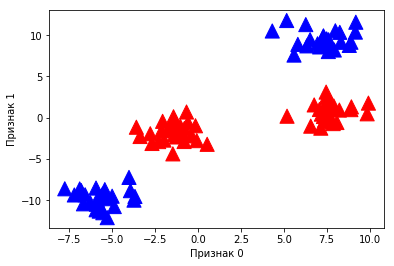

In [5]:
from sklearn.datasets import make_blobs
%matplotlib inline
import mglearn
from matplotlib import pyplot as plt
import numpy as np
X, y = make_blobs(centers=4, random_state=8)
y = y % 2   #уменьшаем количество классов
plt.scatter(X[:, 0], X[:, 1], c=["b" if i==0 else "r" for i in y], s=200, marker="^")
plt.xlabel("Признак 0")
plt.ylabel("Признак 1");

C:\Users\Windows10x64\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


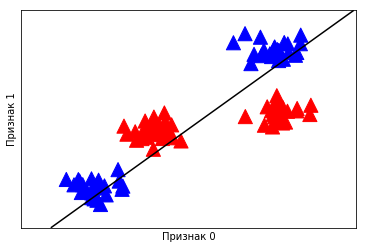

In [6]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
plt.scatter(X[:, 0], X[:, 1], c=["b" if i==0 else "r" for i in y], s=200, marker="^")
plt.xlabel("Признак 0")
plt.ylabel("Признак 1");

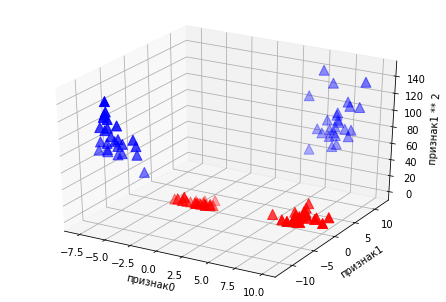

In [7]:
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# визуализируем в 3D
ax = Axes3D(figure)
# сначала размещаем на графике все точки с y == 0, затем с y == 1
mask = y == 0

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', marker="^", s=100)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=100)

ax.set_xlabel("признак0")
ax.set_ylabel("признак1")
ax.set_zlabel("признак1 ** 2");

C:\Users\Windows10x64\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


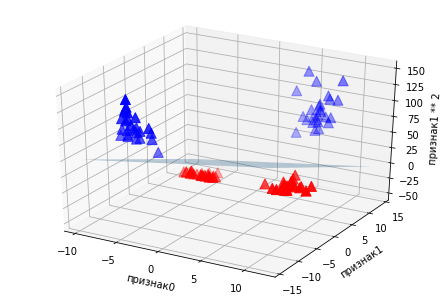

In [9]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_#ravel() преобразует многомерный массив в одномерный
# показать границу принятия решений линейной модели
figure = plt.figure()
ax = Axes3D(figure)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', marker="^", s=100)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=100)

ax.set_xlabel("признак0")
ax.set_ylabel("признак1")
ax.set_zlabel("признак1 ** 2");

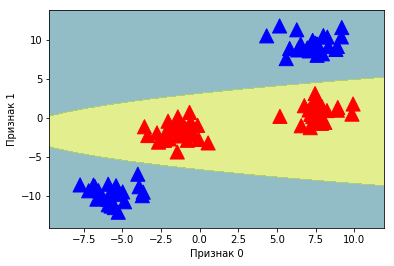

In [10]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
# decision_function в отличие от метода predict возвращает не метку класса, а вероятность его пренадлежания
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], alpha=0.5)

plt.scatter(X[:, 0], X[:, 1], c=["b" if i==0 else "r" for i in y], s=200, marker="^")
plt.xlabel("Признак 0")
plt.ylabel("Признак 1");

*Из вышесказанного можно сделать вывод о том, что добавление нелинейных признаков может улучшить прогнозную силу линейной модели. Однако часто мы не знаем, какие признаки необходимо добавить, а добавление большего числа признаков (например, рассмотрение всех возможных взаимодействий в 100-мерном пространстве признаков) может очень сильно увеличить стоимость вычислений.*

*Существуют два способа размещения данных в высокоразмерном пространстве, которые чаще всего используются методом опорных
векторов: полиномиальное ядро, которое вычисляет все возможные полиномиальные комбинации исходных признаков до определенной
степени, и ядро RBF (радиальная базисная функция), также известное как гауссовское ядро. Гауссовское ядро немного сложнее объяснить, поскольку оно соответствует бесконечному пространству признаков. Объяснить гауссовское ядро можно так: оно рассматривает все возможные полиномы всех степеней, однако важность признаков снижается с возрастанием степени.*

# *Понимание принципов работы SVM*

*В ходе обучения SVM вычисляет важность каждой точки обучающих данных с точки зрения определения решающей границы между двумя
классами. Обычно лишь часть точек обучающего набора важна для определения границы принятия решений: точки, которые лежат на
границе между классами. Они называются опорными векторами (support vectors), и дали свое название методу опорных векторов*

*Чтобы получить прогноз для новой точки, измеряется расстояние до каждого опорного вектора. Классификационное решение принимается исходя из расстояний до опорных векторов, а также важности опорных векторов, полученных в процессе обучения (хранятся в атрибуте dual_coef_ класса SVC).*

*Расстояние между точками данных измеряется с помощью гауссовского ядра*

\begin{align}
k(x_1,x_2) = \exp(-\gamma ||x_1-x_2||^2)
\end{align}

*Здесь x1 и x2 – точки данных, || x1 - x2 || обозначает евклидово расстояние, а 'y' (гамма) – параметр, который регулирует ширину гауссовского ядра.*

In [11]:
from sklearn.svm import SVC
import mglearn
from ipywidgets import interact, FloatSlider, RadioButtons
X, y = mglearn.tools.make_handcrafted_dataset()

@interact(gamma = FloatSlider(min=0.01, max=20, value=0.1, continuous_update=False),
         C = FloatSlider(min=0.01, max=20, value=10, continuous_update=False),
         kernel=RadioButtons(options=['rbf', 'linear', 'poly'], description="kernel"))
def plotsvc(gamma, C, kernel):
    svm = SVC(kernel=kernel, C=C, gamma=gamma).fit(X, y)
    mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
    # размещаем на графике опорные векторы
    sv = svm.support_vectors_
    # метки классов опорных векторов определяются знаком дуальных коэффициентов
    sv_labels = svm.dual_coef_.ravel() > 0
    mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
    plt.xlabel("Признак 0")
    plt.ylabel("Признак 1");

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='gamma', max=20.0, min=0.01)…

*Здесь мы скорректировали параметр C и параметр gamma, которые сейчас подробно рассмотрим*

*Параметр gamma – это параметр формулы, приведенной выше. Он регулирует ширину гауссовского ядра. Параметр gamma
задает масштаб расстояний между точками. Параметр С представляет собой параметр регуляризации.*

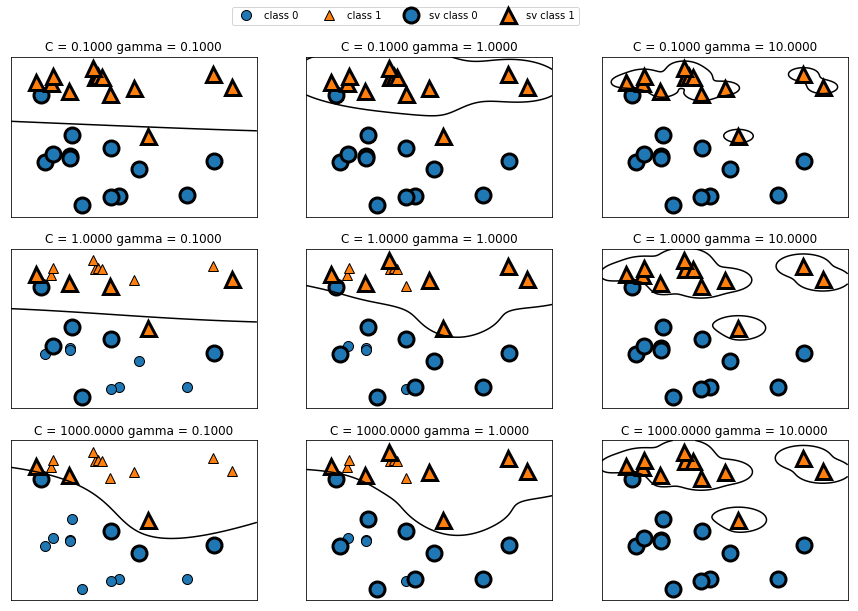

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

*Небольшое значение gamma соответствует большому радиусу гауссовского ядра, это означает, что многие точки
рассматриваются как расположенные поблизости. Это приводит к получению очень гладких границ принятия решений, показанных в левой
части графика, а границы, которые больше фокусируются на отдельных точках, расположились в правой части графика. Низкое значение gamma означает медленное изменение решающей границы, которое дает модель низкой сложности, в то время как высокое значение gamma дает более сложную модель.*

*небольшое значение C соответствует модели с весьма жесткими ограничениями, в которой каждая точка данных может иметь лишь очень ограниченное влияние. В левом верхнем углу рис. можно увидеть, что граница принятия решений выглядит как почти линейная, неправильно классифицированные точки почти не влияют на линию. Увеличение значения C, как показано в левом нижнем углу, позволяет этим точкам оказывать более сильное влияние*

# *Ядра*

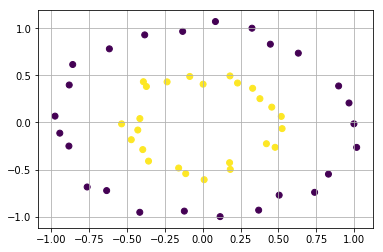

In [11]:
from sklearn.datasets import make_circles
x_circle, y_circle = make_circles(n_samples=50, noise=0.05, factor=.5)
plt.scatter(x_circle[:,0], x_circle[:,1], c=y_circle)
plt.grid(True)

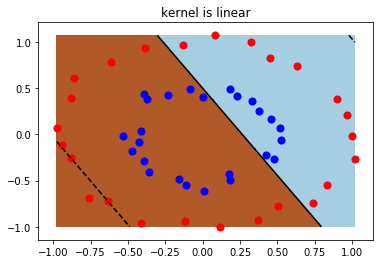

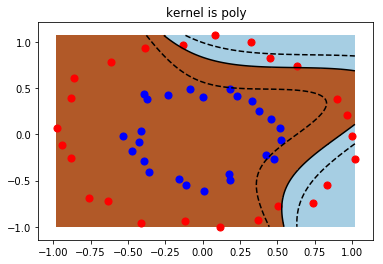

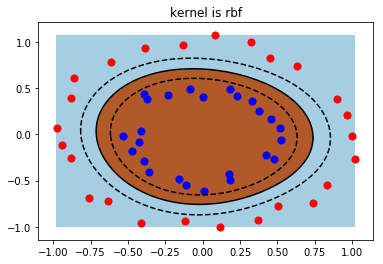

In [12]:
kernals = ['linear', 'poly', 'rbf']
for kernel in kernals:
    model = SVC(kernel=kernel, gamma=2).fit(x_circle, y_circle)
    X0 = x_circle[np.where(y_circle == 0)]
    X1 = x_circle[np.where(y_circle == 1)]
    ax1_min = x_circle[:,0].min()
    ax1_max = x_circle[:,0].max()
    ax2_min = x_circle[:,1].min()
    ax2_max = x_circle[:,1].max()
    
    xx,yy = np.mgrid[ax1_min:ax1_max:200j,ax2_min:ax2_max:200j]
    z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    plt.pcolormesh(xx, yy, z>0, cmap=plt.cm.Paired)
    plt.contour(xx, yy, z, colors=['k','k','k'], linestyles=['--', '-', '--'], levels=[-0.5, 0, 0.5])
    plt.scatter(X0[:,0], X0[:,1], c='r', s=50)
    plt.scatter(X1[:,0], X1[:,1], c='b', s=50)
    plt.title(f'kernel is {kernel}')
    plt.show()

* **Хотя SVM часто дает хорошее качество модели, он очень чувствителен к настройкам параметров и масштабированию данных. В частности, SVM требует, чтобы все признаки были измерены в одном и том же масштабе**

# Предварительная обработка данных для SVM

*Один из способов решения этой проблемы – масштабирование всех признаков таким образом, чтобы все они имели примерно один и тот же масштаб. Общераспространенный метод масштабирования для ядерного SVM заключается в масштабировании данных так, чтобы все признаки принимали значения от 0 до 1*

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(load_breast_cancer().data, load_breast_cancer().target, random_state=0)

In [14]:
# вычисляем минимальное значение для каждого признака обучающего набора
min_on_training = X_train.min(axis=0)
# вычисляем ширину диапазона для каждого признака (max - min) обучающего набора
range_on_training = (X_train - min_on_training).max(axis=0)
# вычитаем минимальное значение и затем делим на ширину диапазона
# min=0 и max=1 для каждого признака
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Минимальное значение для каждого признака\n{}".format(X_train_scaled.min(axis=0)))
print("Максимальное значение для каждого признака\n {}".format(X_train_scaled.max(axis=0)))

Минимальное значение для каждого признака
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Максимальное значение для каждого признака
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [17]:
# используем ТО ЖЕ САМОЕ преобразование для тестового набора,
# используя минимум и ширину диапазона из обучающего набора
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(svc.score(X_train_scaled, y_train)))

print("Правильность на тестовом наборе: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.948
Правильность на тестовом наборе: 0.951


C:\Users\Bogdan\Anacondaa3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(svc.score(X_train_scaled, y_train)))

print("Правильность на тестовом наборе: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.972


C:\Users\Bogdan\Anacondaa3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### *Автоматизированный метод нормализации данных*

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
x_train_new_scaler = scaler.fit(X_train).transform(X_train)
x_test_new_scaler = scaler.fit(X_train).transform(X_test)

In [21]:
svc = SVC(C=1000)
svc.fit(x_train_new_scaler, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(svc.score(x_train_new_scaler, y_train)))

print("Правильность на тестовом наборе: {:.3f}".format(svc.score(x_test_new_scaler, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.972


C:\Users\Bogdan\Anacondaa3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# *Преимущества и недостатки*

*Ядерный метод опорных векторов – это модели, которые обладают мощной прогнозизующей силой и хорошо работают на различных наборах данных. SVM позволяет строить сложные решающие границы, даже если данные содержат лишь несколько признаков. Они хорошо работают на низкоразмерных и высокоразмерных данных (то есть когда у нас мало или, наоборот, много признаков), однако плохо масштабируются с ростом объема данных. Запуск SVM на наборе данных объемом 10000 наблюдений не составляет проблем, однако работа с наборами данных объемом 100000 наблюдений и больше может стать сложной задачей с точки зрения времени вычислений и использования памяти. Другим недостатком является то, что SVM требует тщательной предварительной обработки данных и настройки параметров*

***

*Метрики Качества*
===

In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
y = digits.target == 9  #создаем несбалансированные данные. Это данные, в котором количество одного класса явно доминирует
                        # над количеством других
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

*Миноритарный класс - класс, который находится в явном меньшистве примеров*

*Мажоритарный класс - класс который находится в подавляющем большинстве примеров*

In [23]:
from sklearn.dummy import DummyClassifier
import numpy as np
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)#предсказывает тольеко мажоритарный класс
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированные метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 0.90


In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(tree.score(X_test, y_test)))

Правильность на тестовом наборе: 0.92


*Согласно score разница между этими моделями незначительная*

In [25]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)#предсказывает рандомный класс
pred_dummy = dummy.predict(X_test)
print("правильность dummy: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("правильность logreg: {:.2f}".format(logreg.score(X_test, y_test)))

правильность dummy: 0.83
правильность logreg: 0.98


C:\Users\Bogdan\Anacondaa3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
from sklearn.metrics import confusion_matrix
import pandas as pd
confusion = confusion_matrix(y_test, pred_logreg)
pd.DataFrame(confusion,index=["not nine", "nine"], columns=["not nine", "nine"])

,not nine,nine
not nine,401,2
nine,8,39


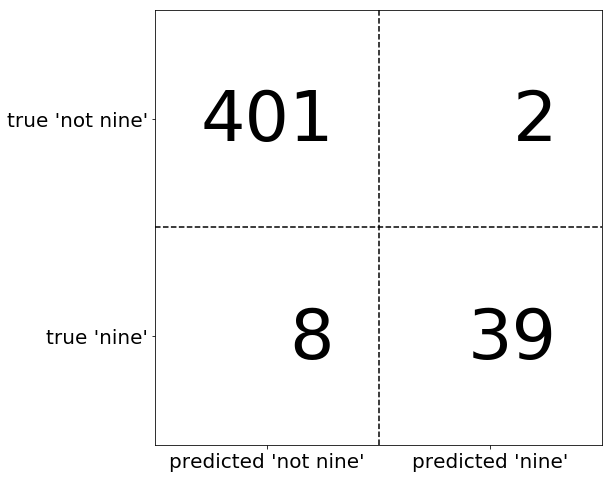

In [27]:
import mglearn
%matplotlib inline
mglearn.plots.plot_confusion_matrix_illustration()

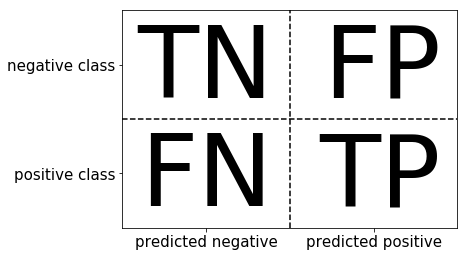

In [28]:
mglearn.plots.plot_binary_confusion_matrix()

In [29]:
print("Наиболее часто встречающийся класс:")
pd.DataFrame(confusion_matrix(y_test, pred_most_frequent),index=["not nine", "nine"], columns=["not nine", "nine"])

Наиболее часто встречающийся класс:


,not nine,nine
not nine,403,0
nine,47,0


In [30]:
print("Дамми-модель:")
pd.DataFrame(confusion_matrix(y_test, pred_dummy),index=["not nine", "nine"], columns=["not nine", "nine"])

Дамми-модель:


,not nine,nine
not nine,370,33
nine,42,5


In [31]:
print("Дерево решений:")
pd.DataFrame(confusion_matrix(y_test, pred_tree),index=["not nine", "nine"], columns=["not nine", "nine"])

Дерево решений:


,not nine,nine
not nine,390,13
nine,24,23


In [32]:
print("Логистическая регрессия")
pd.DataFrame(confusion_matrix(y_test, pred_logreg),index=["not nine", "nine"], columns=["not nine", "nine"])

Логистическая регрессия


,not nine,nine
not nine,401,2
nine,8,39


\begin{align}
Правильность = \frac{TP + TN}{TP + TN + FP + FN}
\end{align}

# *Точность, Полнота, F-мера*

\begin{align}
Точность(precision) = \frac{TP}{TP + FP}
\end{align}

*Точность используется в качестве показателя качества модели, когда
цель  снизить количество ложно положительных
примеров*

\begin{align}
Полнота(recall) = \frac{TP}{TP + FN}
\end{align}

*Полнота используется в качестве показателя качества модели, когда
важно снизить количество ложноотрицательных примеров*

*Всегда необходимо найти компромисс между оптимизацией полноты и оптимизацией точности. Вы легко можете получить идеальную
полноту, спрогнозировав все примеры как положительные (не будет никаких ложно отрицательных и истинно отрицательных примеров).
Однако прогнозирование всех примеров как положительных приведет к большому количеству ложноположительных примеров, и,
следовательно, точность будет очень низкой*

*Точность и полнота – это лишь две метрики из множества показателей классификации, получаемых с помощью TP, FP, TN и FN. Вы можете найти подробное описание метрик в [Википедии](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)*

*Хотя точность и полнота являются очень важными метриками, сами
по себе они не дадут вам полной картины. Одним из способов
подытожить их является F-мера (F-measure), которая представляет собой
гармоническое среднее точности и полноты:*

\begin{align}
F =2* \frac{Точность*Полнота}{Точность+Полнота}
\end{align}

***

\begin{align}
F_{\beta} =(1+\beta)^2* \frac{Точность*Полнота}{\beta^2*Точность+Полнота}
\end{align}

\begin{align}
0<\beta<1 
\end{align}*Есле важна точность*
\begin{align}
\beta>1 
\end{align}*Есле важна полнота*

In [33]:
from sklearn.metrics import f1_score
print("f1-мера наибольшая частота: {:.2f}".format(f1_score(y_test, pred_most_frequent)))

print("f1-мера дамми: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1-мера дерево: {:.2f}".format(f1_score(y_test, pred_tree)))

print("f1-мера логистическая регрессия: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1-мера наибольшая частота: 0.00
f1-мера дамми: 0.12
f1-мера дерево: 0.55
f1-мера логистическая регрессия: 0.89


C:\Users\Bogdan\Anacondaa3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


*Здесь мы  получаем
сообщение об ошибке для прогнозов модели most_frequent, поскольку не
было получено ни одного прогноза положительного класса (таким
образом, знаменатель в формуле расчета f-меры равен нулю)*

In [34]:
from sklearn.metrics import classification_report
print("Наиболее часто встречающийся класс:")
print(f"score - {dummy_majority.score(X_test, y_test)}\n")
print(classification_report(y_test, pred_most_frequent, target_names=["не-девятка", "девятка"]))

Наиболее часто встречающийся класс:
score - 0.8955555555555555

              precision    recall  f1-score   support

  не-девятка       0.90      1.00      0.94       403
     девятка       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\Bogdan\Anacondaa3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


*Последняя строка высчитывается следующим образом:*
>*Высчитывается вес каждого показателя (403/450=0,8955) и (47/450=0,1044444)
>затем каждый вес умножается на соответствующее значение и складываются(0,8955 * 0,94 + 0,104444 * 0=0,85)*

In [35]:
print("Дамми-модель:")
print(f"score - {dummy.score(X_test, y_test)}\n")# обратить внимание, что сумма точности и сумма полноты равна 1
print(classification_report(y_test, pred_dummy,target_names=["не-девятка", "девятка"]))

Дамми-модель:
score - 0.8155555555555556

              precision    recall  f1-score   support

  не-девятка       0.90      0.92      0.91       403
     девятка       0.13      0.11      0.12        47

    accuracy                           0.83       450
   macro avg       0.51      0.51      0.51       450
weighted avg       0.82      0.83      0.83       450



In [36]:
print("Дерево решений:")
print(f"score - {tree.score(X_test, y_test)}\n")
print(classification_report(y_test, pred_tree,target_names=["не-девятка", "девятка"]))

Дерево решений:
score - 0.9177777777777778

              precision    recall  f1-score   support

  не-девятка       0.94      0.97      0.95       403
     девятка       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [37]:
print("Логистическая регрессия")
print(f"score - {logreg.score(X_test, y_test)}\n")
print(classification_report(y_test, pred_logreg,target_names=["не-девятка", "девятка"]))

Логистическая регрессия
score - 0.9777777777777777

              precision    recall  f1-score   support

  не-девятка       0.98      1.00      0.99       403
     девятка       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



In [38]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
X, y = make_blobs(n_samples = 4000, centers = 2, cluster_std = [7.0, 3.0], random_state = 22)
X = list(X)
y = list(y)

for index,_ in enumerate(y):
    if y[index] == 1:
        del X[index]
        del y[index]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

In [39]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       523
           1       0.67      0.84      0.75       146

    accuracy                           0.87       669
   macro avg       0.81      0.86      0.83       669
weighted avg       0.89      0.87      0.88       669



In [40]:
y_pred_lower_threshold = svc.decision_function(X_test) > 0.2
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       523
           1       0.68      0.82      0.74       146

    accuracy                           0.88       669
   macro avg       0.81      0.85      0.83       669
weighted avg       0.89      0.88      0.88       669



*Для класса 1 мы получаем относительно небольшое значение
точности, поскольку класс 0
представлен гораздо большим количеством примеров. Классификатор
лучше прогнозирует класс 0, и существенно хуже меньший по размеру
класс 1.*

***

# *Кривые Точности-полноты*

In [41]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))#thresholds - пороговые значения

*Функция precision_recall_curve возвращает список значений точности и полноты для всех возможных пороговых значений*

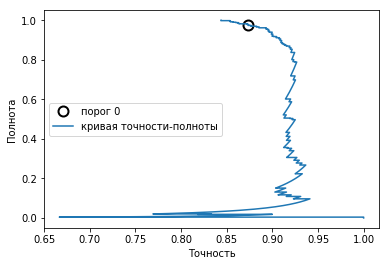

In [42]:
# используем больший объем данных, чтобы получить более гладкую кривую
X, y = make_blobs(n_samples=4000, centers=2, cluster_std=[7.0, 2],random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# находим ближайший к нулю порог
close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,label="порог 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="кривая точности-полноты")
plt.xlabel("Точность")
plt.ylabel("Полнота")
plt.legend(loc="best");

*Чем ближе кривая подходит к верхнему правом углу, тем лучше классификатор* **при сбалансированных классах**

C:\Users\Bogdan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


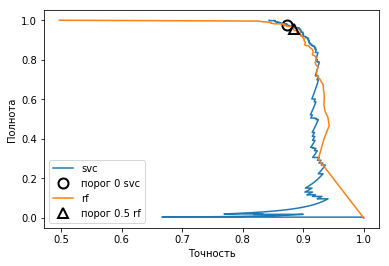

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# в RandomForestClassifier есть predict_proba, но нет decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="порог 0 svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
markersize=10, label="порог 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Точность")
plt.ylabel("Полнота")
plt.legend(loc="best");

In [40]:
print("f1-мера random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1-мера svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1-мера random forest: 0.920
f1-мера svc: 0.921


*Сравнение двух кривых точности-полноты дает много детальной информации, но представляет собой довольно трудоемкий процесс.
Чтобы выполнить автоматическое сравнение моделей мы могли бы обобщить информацию, содержащуюся в кривой, не ограничиваясь
конкретным пороговым значением или рабочей точкой. Один из способов подытожить информацию кривой заключается в вычислении
интеграла или площади под кривой точности-полноты. Он также известен как метод средней точности*

In [41]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Средняя точность random forest: {:.3f}".format(ap_rf))
print("Средняя точность svc: {:.3f}".format(ap_svc))

Средняя точность random forest: 0.922
Средняя точность svc: 0.914


# *Roc-кривая*

*Еще один инструмент, который обычно используется для анализа поведения классификаторов при различных пороговых значениях, это
кривая рабочей характеристики приемника (receiver operating characteristics curve) или кратко ROC-кривая*

*ROC-кривая позволяет рассмотреть все пороговые значения для данного классификатора, но вместо точности и полноты
она показывает долю ложно положительных примеров (false positive rate, FPR) в сравнении с долей истинно положительных примеров(true positive rate,TPR)*

\begin{align}
FPR =\frac{FP}{FP+TN}
\end{align}

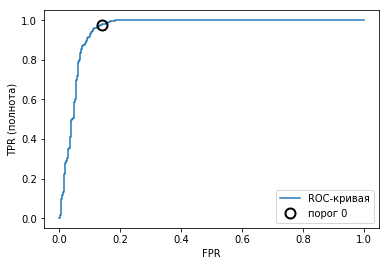

In [42]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC-кривая")
plt.xlabel("FPR")
plt.ylabel("TPR (полнота)")
# находим пороговое значение, ближайшее к нулю
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="порог 0", fillstyle="none", c='k', mew=2)
plt.legend();

*Идеальная ROC-кривая проходит через левый верхний угол, соответствуя классификатору, который дает высокое значение полноты
при низкой доле ложноположительных примеров*

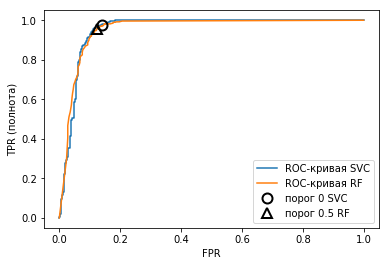

In [43]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC-кривая SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC-кривая RF")
plt.xlabel("FPR")
plt.ylabel("TPR (полнота)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,label="порог 0 SVC", fillstyle="none", c='k', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
         label="порог 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4);

*Как и в случае с кривой точности-полноты, мы хотим подытожить информацию ROC-кривой с помощью одного числа, площади под кривой
обычно ее просто называют AUC*

In [44]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC для случайного леса: {:.3f}".format(rf_auc))
print("AUC для SVC: {:.3f}".format(svc_auc))

AUC для случайного леса: 0.954
AUC для SVC: 0.953


*AUC является более оптимальной, чем правильность при решении задач
несбалансированной классификации*

*AUC можно интерпретировать как меру качества ранжирования положительных примеров*

gamma = 1.00 правильность = 0.90 AUC = 0.50
gamma = 0.05 правильность = 0.90 AUC = 1.00
gamma = 0.01 правильность = 0.90 AUC = 1.00


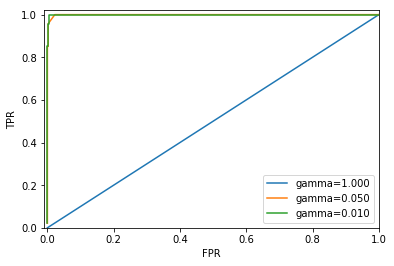

In [45]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f} правильность = {:.2f} AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
    
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best");

*При gamma=1.0 значение AUC фактически соответствует случайному классификатору (случайному результату decision_function). При gamma=0.05 качество модели резко повышается до значения AUC, равного 0.9. И, наконец, при gamma=0.01, мы получим идеальное значение AUC, равное 1.0. Это означает, что в соответствии с решающей функцией все положительные примеры получают более
высокий балл, чем все отрицательные примеры*

***

*[Как выбрать модeль при не сблансированном классе](http://mlwiki.org/index.php/ROC_Analysis)*

# *Метрики при мультиклассах*

In [46]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Правильность: {:.3f}".format(accuracy_score(y_test, pred)))
pd.DataFrame(confusion_matrix(y_test, pred))

Правильность: 0.953


,0,1,2,3,4,5,6,7,8,9
0,37,0,0,0,0,0,0,0,0,0
1,0,39,0,0,0,0,2,0,2,0
2,0,0,41,3,0,0,0,0,0,0
3,0,0,1,43,0,0,0,0,0,1
4,0,0,0,0,38,0,0,0,0,0
5,0,1,0,0,0,47,0,0,0,0
6,0,0,0,0,0,0,52,0,0,0
7,0,1,0,1,1,0,0,45,0,0
8,0,3,1,0,0,0,0,0,43,1
9,0,0,0,1,0,1,0,0,1,44


In [47]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



*Калибровка*
===

In [48]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [49]:
logistic = LogisticRegression().fit(X_train,y_train)

In [50]:
print(classification_report(y_test, logistic.predict(X_test)))

             precision    recall  f1-score   support

      False       0.98      0.99      0.99       403
       True       0.91      0.85      0.88        47

avg / total       0.98      0.98      0.98       450



In [51]:
pd.DataFrame(confusion_matrix(y_test, logistic.predict(X_test)))

,0,1
0,399,4
1,7,40


In [52]:
model_sigmoid = CalibratedClassifierCV(logistic, cv=3, method='sigmoid')

In [53]:
model_sigmoid.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
            cv=3, method='sigmoid')

In [54]:
print(classification_report(y_test, model_sigmoid.predict(X_test)))

             precision    recall  f1-score   support

      False       0.98      1.00      0.99       403
       True       1.00      0.81      0.89        47

avg / total       0.98      0.98      0.98       450



In [55]:
pd.DataFrame(confusion_matrix(y_test, model_sigmoid.predict(X_test)))

,0,1
0,403,0
1,9,38


*В итоге мы получили модель, способную предсказать все метки миноритарного класса*

# *Выводы:*

## Ближайшие соседи
*Подходит для небольших наборов данных, хорош в качестве базовой модели, прост в объяснении.*

## Линейные модели
*Считается первым алгоритмом, который нужно попробовать, хорош для очень больших наборов данных, подходит для данных с очень высокой размерностью.*

## Наивный байесовский классификатор
*Подходит только для классификации. Работает даже быстрее, чем линейные модели, хорош для очень больших наборов данных и
высокоразмерных данных. Часто менее точен, чем линейные модели.*

## Деревья решений
*Очень быстрый метод, не нужно масштабировать данные, результаты можно визуализировать и легко объяснить.*

## Случайные леса
*Почти всегда работают лучше, чем одно дерево решений, очень устойчивый и мощный метод. Не нужно масштабировать данные.
Плохо работает с данными очень высокой размерности и разреженными данными.*

## Градиентный бустинг деревьев решений
*Как правило, немного более точен, чем случайный лес. В отличие от случайного леса медленнее обучается, но быстрее предсказывает и требует меньше памяти. По сравнению со случайным лесом требует настройки большего числа параметров.*

## Метод опорных векторов
*Мощный метод для работы с наборами данных среднего размера и признаками, измеренными в едином масштабе. Требует
масштабирования данных, чувствителен к изменению параметров.*